### Step 1: Importing the Relevant Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2: Data Inspection

In [2]:
#reading the data
train = pd.read_csv("train_Df64byy.csv")
test = pd.read_csv("test_YCcRUnU.csv")

In [3]:
train.shape,test.shape

((50882, 14), (21805, 13))

* __We have 50882 rows and 14 columns in Train set whereas Test set has 21805 rows and 13 columns.__

In [4]:
train.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [5]:
test.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0


In [6]:
#ratio of null values in train data
train.isnull().sum()/train.shape[0] *100

ID                          0.000000
City_Code                   0.000000
Region_Code                 0.000000
Accomodation_Type           0.000000
Reco_Insurance_Type         0.000000
Upper_Age                   0.000000
Lower_Age                   0.000000
Is_Spouse                   0.000000
Health Indicator           22.976691
Holding_Policy_Duration    39.799929
Holding_Policy_Type        39.799929
Reco_Policy_Cat             0.000000
Reco_Policy_Premium         0.000000
Response                    0.000000
dtype: float64

In [7]:
#ratio of null values in test data
test.isnull().sum()/test.shape[0] *100

ID                          0.000000
City_Code                   0.000000
Region_Code                 0.000000
Accomodation_Type           0.000000
Reco_Insurance_Type         0.000000
Upper_Age                   0.000000
Lower_Age                   0.000000
Is_Spouse                   0.000000
Health Indicator           23.054345
Holding_Policy_Duration    39.454254
Holding_Policy_Type        39.454254
Reco_Policy_Cat             0.000000
Reco_Policy_Premium         0.000000
dtype: float64

* __We have 23%, 39% and 39% of missing values in Health Indicator, Holding_Policy_Duration and Holding_Policy_Type columns respectively.__

In [8]:
#categorical features
categorical = train.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1])

#numerical features
numerical= train.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Train Set:",numerical.shape[1])

Categorical Features in Train Set: 6
Numerical Features in Train Set: 8


In [9]:
#categorical features
categorical = test.select_dtypes(include =[np.object])
print("Categorical Features in Test Set:",categorical.shape[1])

#numerical features
numerical= test.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Test Set:",numerical.shape[1])

Categorical Features in Test Set: 6
Numerical Features in Test Set: 7


### Step 3: Data Cleaning

Lets try to figure out how many null values present in the dataset and in which column.

In [10]:
train.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [11]:
test.isnull().sum()

ID                            0
City_Code                     0
Region_Code                   0
Accomodation_Type             0
Reco_Insurance_Type           0
Upper_Age                     0
Lower_Age                     0
Is_Spouse                     0
Health Indicator           5027
Holding_Policy_Duration    8603
Holding_Policy_Type        8603
Reco_Policy_Cat               0
Reco_Policy_Premium           0
dtype: int64

* Health Indicator , Holding_Policy_Duration and Holding_Policy_Type have some missing values in the data

###### Health Indicator

In [12]:
# number of missing values in train & test data
train['Health Indicator'].isnull().sum(),test['Health Indicator'].isnull().sum()

(11691, 5027)

In [13]:
print(train['Health Indicator'].value_counts())
print('******************************************')
print(test['Health Indicator'].value_counts())

X1    13010
X2    10332
X3     6762
X4     5743
X5     1727
X6     1280
X7      196
X8       78
X9       63
Name: Health Indicator, dtype: int64
******************************************
X1    5614
X2    4516
X3    2846
X4    2442
X5     681
X6     514
X7      96
X8      41
X9      28
Name: Health Indicator, dtype: int64


__Since the Health Indicator is a categorical column, we can impute the missing values by "Mode"(Most Repeated Value) from the column__

In [14]:
#Imputing with Mode
train['Health Indicator']= train['Health Indicator'].fillna(train['Health Indicator'].mode()[0])
test['Health Indicator']= test['Health Indicator'].fillna(test['Health Indicator'].mode()[0])

In [15]:
train['Health Indicator'].isnull().sum(),test['Health Indicator'].isnull().sum()

(0, 0)

###### Holding_Policy_Duration

In [16]:
# number of missing values in train & test data
train['Holding_Policy_Duration'].isnull().sum(),test['Holding_Policy_Duration'].isnull().sum()

(20251, 8603)

In [17]:
print(train['Holding_Policy_Duration'].value_counts())
print('******************************************')
print(test['Holding_Policy_Duration'].value_counts())

1.0     4499
14+     4335
2.0     4260
3.0     3586
4.0     2771
5.0     2362
6.0     1894
7.0     1645
8.0     1316
9.0     1114
10.0     813
11.0     546
12.0     513
13.0     511
14.0     466
Name: Holding_Policy_Duration, dtype: int64
******************************************
14+     1892
1.0     1891
2.0     1772
3.0     1606
4.0     1205
5.0      992
6.0      903
7.0      664
8.0      569
9.0      493
10.0     333
11.0     254
13.0     221
14.0     211
12.0     196
Name: Holding_Policy_Duration, dtype: int64


In [18]:
#filling null values with forward fill Method
#forward fill method propagates previous value forward

train['Holding_Policy_Duration']= train['Holding_Policy_Duration'].fillna(0)
test['Holding_Policy_Duration']= test['Holding_Policy_Duration'].fillna(0)

In [19]:
train['Holding_Policy_Duration'].isnull().sum(),test['Holding_Policy_Duration'].isnull().sum()

(0, 0)

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Holding_Policy_Type'>

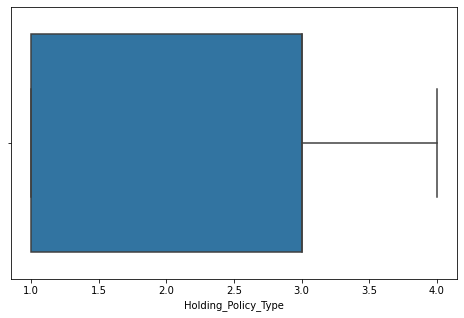

In [20]:
plt.figure(figsize=(8,5))
sns.boxplot('Holding_Policy_Type',data=train)

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Holding_Policy_Type'>

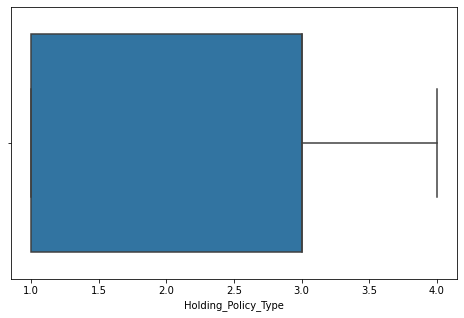

In [21]:
plt.figure(figsize=(8,5))
sns.boxplot('Holding_Policy_Type',data=test)

In [22]:
#filling null values with forward fill Method
#forward fill method propagates previous value forward
train['Holding_Policy_Type']= train['Holding_Policy_Type'].fillna(0)
test['Holding_Policy_Type']= test['Holding_Policy_Type'].fillna(0) 

In [23]:
train['Holding_Policy_Type'].isnull().sum(),test['Holding_Policy_Type'].isnull().sum()

(0, 0)

We have succesfully imputed the missing values from both the Datasets

### Step 4: Exploratory Data Analysis

In [24]:
train.columns

Index(['ID', 'City_Code', 'Region_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Response'],
      dtype='object')

In [25]:
train.head(10)

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,0,0.0,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,X1,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0
5,6,C9,1785,Rented,Individual,52,52,No,X2,5.0,1.0,22,15264.0,1
6,7,C3,679,Owned,Individual,28,28,No,X1,0,0.0,17,10640.0,0
7,8,C1,3175,Owned,Joint,75,73,Yes,X4,9.0,4.0,17,29344.0,1
8,9,C15,3497,Owned,Joint,52,43,No,X1,14.0,3.0,1,27283.2,0
9,10,C1,530,Owned,Joint,59,26,Yes,X1,7.0,4.0,18,21100.8,1


C:\Users\HP\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Accomodation_Type', ylabel='count'>

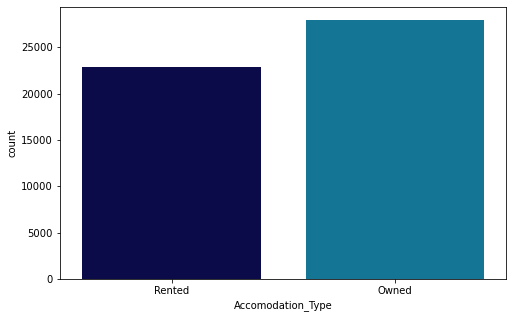

In [26]:
plt.figure(figsize=(8,5))
sns.countplot('Accomodation_Type',data=train,palette='ocean')

__Most of the customers own their house.__

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Reco_Insurance_Type', ylabel='count'>

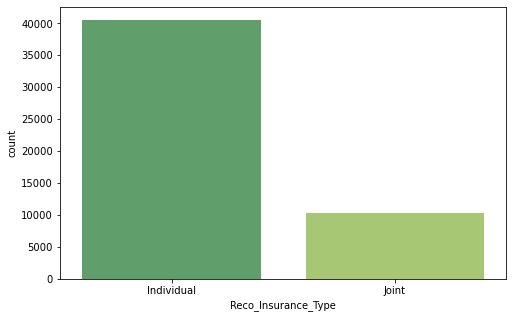

In [27]:
plt.figure(figsize=(8,5))
sns.countplot('Reco_Insurance_Type',data=train,palette='summer')

__Most of the customers prefer Individual type for the recommended insurance.__

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Is_Spouse', ylabel='count'>

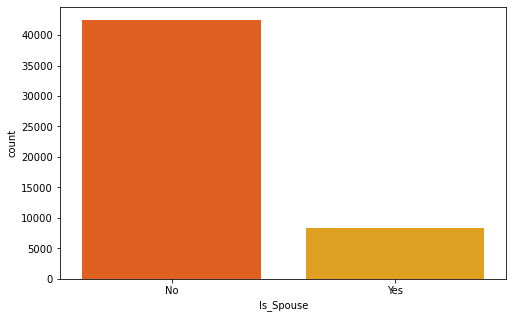

In [28]:
plt.figure(figsize=(8,5))
sns.countplot('Is_Spouse',data=train,palette='autumn')

__Very few customers married to each other.__

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Holding_Policy_Type', ylabel='count'>

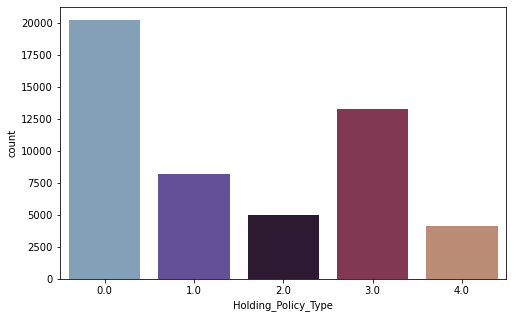

In [29]:
plt.figure(figsize=(8,5))
sns.countplot('Holding_Policy_Type',data=train,palette='twilight')

__Most of the customers prefer 3rd type of Policy.__

### Step 5 : Feature Engineering

__Numerical and One-Hot Coding of Categorical variables__

In [33]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
var_mod = ['City_Code','Accomodation_Type','Reco_Insurance_Type','Is_Spouse','Health Indicator']
le = LabelEncoder()
for i in var_mod:
    train[i] = le.fit_transform(train[i])
    
#One Hot Coding:
train = pd.get_dummies(train, columns=['City_Code','Accomodation_Type','Reco_Insurance_Type','Is_Spouse','Health Indicator'])

In [35]:
var_mod = ['City_Code','Accomodation_Type','Reco_Insurance_Type','Is_Spouse','Health Indicator']
le = LabelEncoder()
for i in var_mod:
    test[i] = le.fit_transform(test[i])
#One Hot Coding:
test = pd.get_dummies(test, columns=['City_Code','Accomodation_Type','Reco_Insurance_Type','Is_Spouse','Health Indicator'])

### Step 5: Building Model 

In [36]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
train = train.select_dtypes(exclude='object')
test = test.select_dtypes(exclude='object')

In [42]:
# Seperate Features and Target
X= train.drop(columns = ['Response'], axis=1)
y= train['Response']

In [43]:
# 20% data as validation set
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.2,random_state=22)

In [44]:
# Model Building
features= X.columns

In [58]:
RF = RandomForestClassifier(n_estimators = 100,random_state = 5).fit(X_train,y_train)

In [59]:
print('Train set accuracy: %f'%RF.score(X_train,y_train))
print('Test set accuracy: %f'%RF.score(X_valid,y_valid))

Train set accuracy: 1.000000
Test set accuracy: 0.757198


C:\Users\HP\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

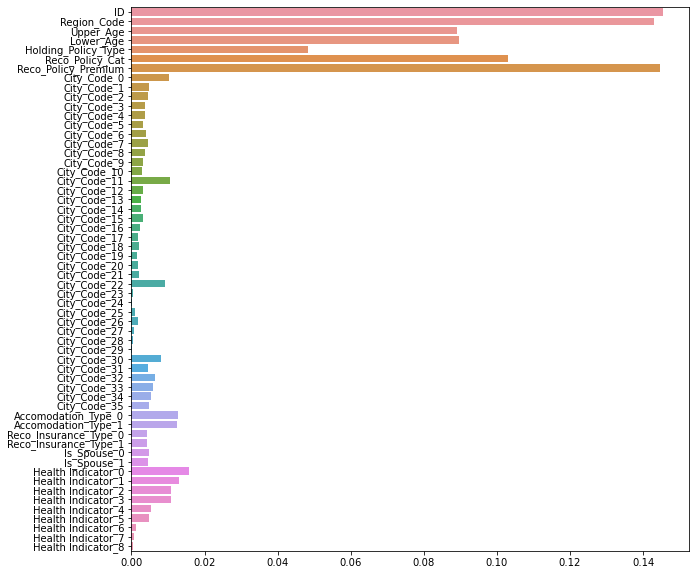

In [47]:
# Barplot for coefficients
plt.figure(figsize=(10,10))
sns.barplot(RF.feature_importances_,features)

In [ ]:
submission = pd.read_csv("sample_submission_QrCyCoT.csv")

In [ ]:
final_predictions = RF.predict(test)
submission['Response'] = final_predictions

In [ ]:
#only positive predictions for the target variable
submission['Response'] = submission['Response'].apply(lambda x: 0 if x<0 else x)
submission.to_csv('my_sub_RF.csv', index=False)